# Demo do projeto

Através deste notebook é possível testar o funcionamento do nosso projeto de uma forma ágil e simples. Está dividido em várias secções cujo objetivo é facilitar a compreensão geral da simulação e dos algortimos de aprendizagem utilizados.

Podemos separar este notebook nas seguintes secções úteis:
* Teste da simulação e comportamento do agente com o agente aleatório
* Política fixa, análise de desempenho para os problemas
* Algoritmo genético + Redes Neuronais para ambos os problemas
* Aprendizagem por reforço para ambos os problemas

De notar que o nosso projeto foi criado para ser configurado através de ficheiros, nomeadamente: ficheiro do controlador, da simulação e do(s) agente(s). Por agora, os modelos de aprendizagem apenas funcionam com 1 agente, algo que poderá mudar mais tarde.

**Conteúdo dos ficheiros**:
* Ficheiro do Controlador: modo (se teste se aprendizagem); problema (se recoleção, se farol); ficheiro do motor de simulação usado e os vários parâmetros dos algoritmos
* Ficheiro do Motor de Simulação (independente do modo ou do problema): nº de passos máximos; descrição do ambiente (tamanho e elementos) e ficheiro(s) dos agente(s)
* Ficheiro do Agente: id; posição inicial; ângulo inicial e sensor

Como nos apercebemos que pode ser complicado gerir os ficheiros, criámos este notebook para que fosse agilizado o processo de teste.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from controladorGenetico import *


 #### *Funções Auxiliares Fixo e Aleatório*

In [2]:
from controlador import criarControlador

def resetFarol(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente,politica):
    texto_controlador = f"A\nF\n{politica}\nMS {ficheiro_simulacao}"
    texto_simulação = f"5\n50\nAG {ficheiro_agente}\n E farol (3,3) False False 100\nE parede (1,2) False True 0\nE parede (1,3) False True 0\nE parede (1,4) False True 0"
    texto_agente = "1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulação)
    with open("agentes/"+ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)

def changeTest(ficheiro_controlador):
    with open(ficheiro_controlador, "r", encoding="utf-8") as f:
        linhas = f.readlines()
    linhas[0] = "T\n"
    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.writelines(linhas)



def resetRecolecao(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente,politica,tempo):
    texto_controlador = f"A\nR {tempo}\n{politica}\nMS {ficheiro_simulacao}"
    texto_simulação = f"5\n50\nAG {ficheiro_agente}\nE ninho (3,3) False False 0\nE parede (1,2) False True 0\nE ovo (2,1) True False 10"
    texto_agente = "1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulação)
    with open("agentes/"+ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)

## Teste da Simulação com o Agente Aleatório

### Farol

In [3]:
ficheiro_controlador = "controladorAleatorio_farol.txt"
resetFarol(ficheiro_controlador,"simulacao_farol_aleatorio.txt","agente_aleatorio_farol.txt","aleatorio")

In [4]:
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

In [5]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

### Recolecao

In [ ]:
ficheiro_controlador = "controladorAleatorio_recolecao.txt"
resetRecolecao(ficheiro_controlador,"simulacao_recolecao_aleatorio.txt","agente_aleatorio_recolecao.txt","aleatorio",30)

In [ ]:
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

In [ ]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

## Teste da Política Fixa

### Farol

In [ ]:
ficheiro_controlador = "controladorFixo_farol.txt"
resetFarol(ficheiro_controlador, "simulacao_farol_fixo.txt", "agente_fixo_farol.txt", "fixo")
controlador = criarControlador(ficheiro_controlador)

In [ ]:
controlador.executa()

In [ ]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

### Recolecao

In [ ]:
ficheiro_controlador = "controladorFixo_recolecao.txt"
resetRecolecao(ficheiro_controlador, "simulacao_recolecao_fixo.txt", "agente_fixo_recolecao.txt", "fixo",30)
controlador = criarControlador(ficheiro_controlador)

In [ ]:
controlador.executa()

In [ ]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

## Teste do Algoritmo Genético

In [2]:
import matplotlib.pyplot as plt
import numpy as np
#so para funcionae

def graficoCaminhos(caminhos,motor):

    grelha_size = motor.ambiente.tamanhoGrelha

    fig, ax = plt.subplots(figsize=(grelha_size * 0.7, grelha_size * 0.7))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    ax.set_xlim(0, grelha_size)
    ax.set_ylim(grelha_size, 0)

    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    cmap = plt.get_cmap("rainbow")
    colors = cmap(np.linspace(0, 1, len(caminhos)))

    if len(caminhos) == 1:
        plot_gens = [0]
    else:
        indices = {0, len(caminhos)//2, len(caminhos)-1}
        plot_gens = sorted(list(indices))

    for i in plot_gens:
        path = caminhos[i]

        x_vals = [p.getX() for p in path]
        y_vals = [p.getY() for p in path]

        ax.plot(x_vals, y_vals, color=colors[i], alpha=0.7,
                label=f"Geração {i+1}", linewidth=2)

        if x_vals:
            ax.plot(x_vals[-1], y_vals[-1], 'x', color=colors[i],
                    markersize=10, markeredgewidth=2)

    for pos, ele in motor.ambiente.grelha.items():
        if ele.getId() != (-1, -1, -1):
            ax.text(
                pos.x,
                pos.y,
                str(ele) if hasattr(ele, "nome") else str(ele),
                fontsize=13,
                ha="center",
                va="center",
                color="black",
                fontweight="bold"
            )

    ax.set_title("Melhores Caminhos por Geração", pad=20)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.grid(True, color='lightgray', linestyle='--')

    ax.legend(loc='lower right')
    plt.show()

def grafico_fitness_recompensas(valores,tipo):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(valores)),valores, marker='o')
    if tipo == "reforco": mensagem = "Episodes"
    else: mensagem = "Generation"
    plt.title("Average Combined Fitness per " + mensagem)
    plt.xlabel(mensagem)
    plt.ylabel("Average Combined Fitness Score")
    plt.grid(True)
    plt.show()

def grafico_passos(passos):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(passos)), passos, marker='o')
    plt.title("Nº de Passos até à condição de fim")
    plt.xlabel("Nº repetições")
    plt.ylabel("Passos")
    plt.grid(True)
    plt.show()


import numpy as np
import matplotlib.pyplot as plt

def criar_heatmap(mapa, tamanho_base=1.0, cmap="coolwarm", titulo="Heatmap de Visitas"):

    # Converter para arrays NumPy
    coords = np.array([(p.x, p.y) for p in mapa.keys()])
    valores = np.array(list(mapa.values()))

    xs = coords[:, 0]
    ys = coords[:, 1]

    x_min, x_max = xs.min(), xs.max()
    y_min, y_max = ys.min(), ys.max()

    largura = x_max - x_min + 1
    altura = y_max - y_min + 1

    # Criar matriz heatmap diretamente
    heatmap = np.zeros((altura, largura), dtype=float)
    heatmap[ys - y_min, xs - x_min] = valores

    fig, ax = plt.subplots(
        figsize=(largura * tamanho_base, altura * tamanho_base)
    )

    # Plot
    im = ax.imshow(
        heatmap,
        cmap=cmap,
        interpolation="nearest",
        aspect="equal",
        origin="upper"
    )

    plt.colorbar(im, label="Número de Visitas")

    # Ticks e rótulos
    ax.set_xticks(np.arange(largura))
    ax.set_yticks(np.arange(altura))
    ax.set_xticklabels(np.arange(x_min, x_max + 1))
    ax.set_yticklabels(np.arange(y_min, y_max + 1))

    ax.set_xlabel("Posição X")
    ax.set_ylabel("Posição Y")
    ax.set_title(titulo)

    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    for pos, ele in motor.ambiente.grelha.items():
        if ele.getId() != (-1, -1, -1):
            ax.text(
                pos.x,
                pos.y,
                str(ele) if hasattr(ele, "nome") else str(ele),
                fontsize=20,
                ha="center",
                va="center",
                color="black",
                fontweight="bold"
            )

    # Grelha
    ax.set_xticks(np.arange(-.5, largura, 1), minor=True)
    ax.set_yticks(np.arange(-.5, altura, 1), minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=0.8)

    plt.tight_layout()
    plt.show()




### Farol

In [3]:
from controlador import *

def resetFarolGenetico(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente, politica,geracoes,num_individuos,taxa_mutacao,taxa_elite,novelty_weight,num_novelty,num_archives,torneio):
    texto_controlador = f"A\nF\n{politica}\n{geracoes}\n{num_individuos}\n{taxa_mutacao}\n{taxa_elite}\n{novelty_weight}\n{num_novelty}\n{num_archives}\n{torneio}\nMS {ficheiro_simulacao}"
    texto_simulacao = f"5\n50\nAG {ficheiro_agente}\n E farol (3,3) False False 100\nE parede (1,2) False True 0\nE parede (1,3) False True 0\nE parede (1,4) False True 0"
    texto_agente = "1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulacao)
    with open("agentes/" + ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)


def changeTest(ficheiro_controlador):
    with open(ficheiro_controlador, "r", encoding="utf-8") as f:
        linhas = f.readlines()
    linhas[0] = "T\n"
    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.writelines(linhas)



In [4]:
GERACOES = 100
NUM_INDIVIDUOS = 200
TAXA_MUTACAO = 0.15
TAXA_ELITE = 0.1
NOVELTY_WEIGHT = 300
NUMBER_NOVELTY = 15
NUMBER_ARCHIVES = 5
NUM_TORNEIO = 5

ficheiro_controlador = "controladorGenetico_farol.txt"
resetFarolGenetico(ficheiro_controlador, "simulacao_farol_genetico.txt", "agente_genetico_farol.txt", "genetico",GERACOES,NUM_INDIVIDUOS,TAXA_MUTACAO,TAXA_ELITE,NOVELTY_WEIGHT,NUMBER_NOVELTY,NUMBER_ARCHIVES,NUM_TORNEIO)


In [9]:
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

Gen 1/100 | Avg Combined: -686.77 | Melhor fitness: 295.10)
Gen 2/100 | Avg Combined: -226.36 | Melhor fitness: 224.27)
Gen 3/100 | Avg Combined: 48.58 | Melhor fitness: 191.77)
Gen 4/100 | Avg Combined: 93.48 | Melhor fitness: 181.77)
Gen 5/100 | Avg Combined: 123.74 | Melhor fitness: 181.77)
Gen 6/100 | Avg Combined: 163.94 | Melhor fitness: 181.77)
Gen 7/100 | Avg Combined: 84.93 | Melhor fitness: 161.77)
Gen 8/100 | Avg Combined: 77.90 | Melhor fitness: 151.77)
Gen 9/100 | Avg Combined: 89.10 | Melhor fitness: 151.77)
Gen 10/100 | Avg Combined: 107.42 | Melhor fitness: 161.77)
Gen 11/100 | Avg Combined: 124.41 | Melhor fitness: 148.43)
Gen 12/100 | Avg Combined: 124.30 | Melhor fitness: 148.43)
Gen 13/100 | Avg Combined: 107.88 | Melhor fitness: 148.43)


KeyboardInterrupt: 

In [ ]:
from controladorGenetico import reconstruir_caminho

motor = controlador.criar_motor("genetico")
agente =  motor.agentes[0]
caminhos = [reconstruir_caminho(agente.posicaoAtual, agente.angulo, c) for c in controlador.melhores_caminhos_gen]

graficoCaminhos(caminhos,motor)

In [ ]:
grafico_fitness_recompensas(controlador.fitness_medio_geracao,"genetico")

In [ ]:
grafico_passos(controlador.numero_passos)

In [ ]:
from controladorGenetico import calcular_mapa
motor = controlador.criar_motor("genetico")
agente = motor.agentes[0]
caminhos = [reconstruir_caminho(agente.posicaoAtual, agente.angulo, c) for c in controlador.melhores_caminhos_gen]
mapa = calcular_mapa(caminhos,motor.ambiente.tamanhoGrelha)
criar_heatmap(mapa)

In [ ]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

### Recoleção

In [5]:
from controlador import criarControlador

def resetRecolecaoGenetico(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente, politica, tempo,geracoes,num_individuos,taxa_mutacao,taxa_elite,novelty_weight,num_novelty,num_archives,torneio):
    texto_controlador = f"A\nR {tempo}\n{politica}\n{geracoes}\n{num_individuos}\n{taxa_mutacao}\n{taxa_elite}\n{novelty_weight}\n{num_novelty}\n{num_archives}\n{torneio}\nMS {ficheiro_simulacao}"
    texto_simulação = f"5\n50\nAG {ficheiro_agente}\nE ninho (3,3) False False 0\nE parede (1,2) False True 0\nE ovo (2,1) True False 7"
    texto_agente = "1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulação)
    with open("agentes/" + ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#CONTINUARRRRRR
def criar_heatmap_ref(q, tamanho_base=1.0, cmap="coolwarm", titulo="Heatmap de Visitas"):

    # Converter para arrays NumPy
    coords = np.array([(p.x, p.y) for p in mapa.keys()])
    valores = np.array(list(mapa.values()))

    xs = coords[:, 0]
    ys = coords[:, 1]

    x_min, x_max = xs.min(), xs.max()
    y_min, y_max = ys.min(), ys.max()

    largura = x_max - x_min + 1
    altura = y_max - y_min + 1

    # Criar matriz heatmap diretamente
    heatmap = np.zeros((altura, largura), dtype=float)
    heatmap[ys - y_min, xs - x_min] = valores

    fig, ax = plt.subplots(
        figsize=(largura * tamanho_base, altura * tamanho_base)
    )

    # Plot
    im = ax.imshow(
        heatmap,
        cmap=cmap,
        interpolation="nearest",
        aspect="equal",
        origin="upper"
    )

    plt.colorbar(im, label="Número de Visitas")

    # Ticks e rótulos
    ax.set_xticks(np.arange(largura))
    ax.set_yticks(np.arange(altura))
    ax.set_xticklabels(np.arange(x_min, x_max + 1))
    ax.set_yticklabels(np.arange(y_min, y_max + 1))

    ax.set_xlabel("Posição X")
    ax.set_ylabel("Posição Y")
    ax.set_title(titulo)

    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    # Grelha
    ax.set_xticks(np.arange(-.5, largura, 1), minor=True)
    ax.set_yticks(np.arange(-.5, altura, 1), minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=0.8)

    plt.tight_layout()
    plt.show()

In [ ]:
GERACOES = 100
NUM_INDIVIDUOS = 200
TAXA_MUTACAO = 0.1
TAXA_ELITE = 0.2
NOVELTY_WEIGHT = 1000
NUMBER_NOVELTY = 5
NUMBER_ARCHIVES = 5
NUM_TORNEIO = 5

ficheiro_controlador = "controladorGenetico_recolecao.txt"
resetRecolecaoGenetico(ficheiro_controlador, "simulacao_recolecao_genetico.txt", "agente_genetico_recolecao.txt", "genetico", 30,GERACOES,NUM_INDIVIDUOS,TAXA_MUTACAO,TAXA_ELITE,NOVELTY_WEIGHT,NUMBER_NOVELTY,NUMBER_ARCHIVES,NUM_TORNEIO)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

In [ ]:
motor = controlador.criar_motor("genetico")
agente =  motor.agentes[0]
caminhos = [reconstruir_caminho(agente.posicaoAtual, agente.angulo, c) for c in controlador.melhores_caminhos_gen]

graficoCaminhos(caminhos,motor)

In [ ]:
grafico_fitness_recompensas(controlador.fitness_medio_geracao,"genetico")


In [ ]:
grafico_passos(controlador.numero_passos)

In [ ]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

## Teste Algoritmo Reforço

### Farol

In [11]:
from controlador import criarControlador

def resetFarolReforco(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente, politica,episodios,alpha,gama,eps_inicial,eps_final):
    texto_controlador = f"A\nF\n{politica}\n{episodios}\nMS {ficheiro_simulacao}"
    texto_simulação = f"5\n20\nAG {ficheiro_agente}\n E farol (3,3) False False 100\nE parede (1,2) False True 0\nE parede (1,3) False True 0\nE parede (1,4) False True 0"
    texto_agente = f"1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)\n{alpha}\n{gama}\n{eps_inicial}\n{eps_final}"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulação)
    with open("agentes/" + ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)


def changeTest(ficheiro_controlador):
    with open(ficheiro_controlador, "r", encoding="utf-8") as f:
        linhas = f.readlines()
    linhas[0] = "T\n"
    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.writelines(linhas)


In [12]:
EPISODIOS = 20000
ALPHA = 0.2
GAMA = 0.90
EPS_INICIAL = 1
EPS_FINAL = 0.05

ficheiro_controlador = "controladorReforco_farol.txt"
resetFarolReforco(ficheiro_controlador, "simulacao_farol_reforco.txt", "agente_reforco_farol.txt", "reforco",
                  EPISODIOS,ALPHA,GAMA,EPS_INICIAL,EPS_FINAL)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

Episódio: 0/20000 | Max R: 20.0
Episódio: 1000/20000 | Max R: 1801.0761769683888
Episódio: 2000/20000 | Max R: 3146.007632488735
Episódio: 3000/20000 | Max R: 3858.3479560486503
Episódio: 4000/20000 | Max R: 4400.612126821761
Episódio: 5000/20000 | Max R: 4574.841135169951
Episódio: 6000/20000 | Max R: 4710.367910792972
Episódio: 7000/20000 | Max R: 4814.29639175788
Episódio: 8000/20000 | Max R: 4878.502334938798
Episódio: 9000/20000 | Max R: 4910.265578542238
Episódio: 10000/20000 | Max R: 4935.050430290186
Episódio: 11000/20000 | Max R: 4942.464918532167
Episódio: 12000/20000 | Max R: 4961.589120956496
Episódio: 13000/20000 | Max R: 4967.975015556028
Episódio: 14000/20000 | Max R: 4972.198293302359
Episódio: 15000/20000 | Max R: 4974.869459129469
Episódio: 16000/20000 | Max R: 4979.877188063667
Episódio: 17000/20000 | Max R: 4982.530873157348
Episódio: 18000/20000 | Max R: 4982.880255694201
Episódio: 19000/20000 | Max R: 4983.558197568711
Episódio: 20000/20000 | Max R: 4983.558197568

<class 'controladorReforco.ControladorReforco'>


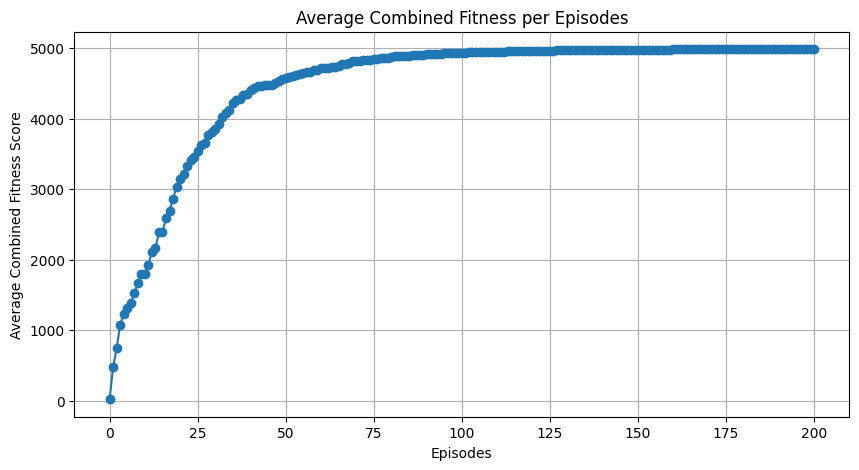

In [13]:
print(type(controlador))
grafico_fitness_recompensas(controlador.melhores_recompensas_ep,"reforco")

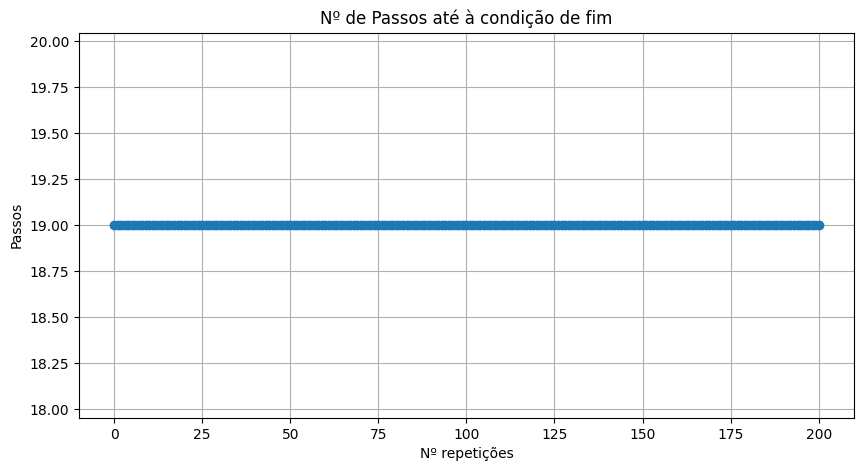

In [14]:
grafico_passos(controlador.numero_passos)

In [10]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

TclError: invalid command name ".!canvas"

### Recolecao

In [ ]:
from controlador import criarControlador

def resetRecolecaoReforco(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente, politica,tempo,episodios,alpha,gama,eps_inicial,eps_final):
    texto_controlador = f"A\nR {tempo}\n{politica}\n{episodios}\nMS {ficheiro_simulacao}"
    texto_simulação = f"5\n50\nAG {ficheiro_agente}\nE ninho (3,3) False False 0\nE parede (1,2) False True 0\nE ovo (2,1) True False 10"
    texto_agente = f"1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)\n{alpha}\n{gama}\n{eps_inicial}\n{eps_final}"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulação)
    with open("agentes/" + ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)

In [ ]:
EPISODIOS = 10000
ALPHA = 0.4
GAMA = 0.99
EPS_INICIAL = 1
EPS_FINAL = 0.05

ficheiro_controlador = "controladorReforco_recolecao.txt"
resetRecolecaoReforco(ficheiro_controlador, "simulacao_recolecao_reforco.txt", "agente_reforco_recolecao.txt", "reforco",30,
                  EPISODIOS, ALPHA, GAMA, EPS_INICIAL, EPS_FINAL)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

In [ ]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()